In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import os

path = os.getcwd()
data_path = 'C:\\Users\\sunil\\Projects\\HackerEarth\\7342422066d511eb\\dataset\\'

In [88]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
sample_sub = pd.read_csv(data_path + 'sample_submission.csv')

In [120]:
pd.set_option('display.max_columns', 100)

In [89]:
train.shape, test.shape

((6500, 20), (3500, 19))

# Data Description

Customer Id	: Represents the unique identification number of the customers

Artist Name	:Represents the name of the artist

Artist Reputation:	Represents the reputation of an artist in the market (the greater the reputation value, the higher the 
reputation of the artist in the market)


Height:	Represents the height of the sculpture

Width:	Represents the width of the sculpture

Weight:	Represents the weight of the sculpture

Material:	Represents the material that the sculpture is made of

Price Of Sculpture:	Represents the price of the sculpture

Base Shipping Price:	Represents the base price for shipping a sculpture

International:	Represents whether the shipping is international

Express Shipment:	Represents whether the shipping was in the express (fast) mode

Installation Included:	Represents whether the order had installation included in the purchase of the sculpture

Transport:	Represents the mode of transport of the order

Fragile:	Represents whether the order is fragile

Customer Information:	Represents details about a customer

Remote Location:	Represents whether the customer resides in a remote location

Scheduled Date:	Represents the date when the order was placed

Delivery Date:	Represents the date of delivery of the order

Customer Location:	Represents the location of the customer

Cost:	Represents the cost of the order


---
# EDA

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the shape of Dataset. Variables and Target column
3. Target Distribution
4. See the variables datatypes
5. See The Number/Percentage Of Missing values
6. Unique Values in each Variable

**1. Brief Look at the Dataset**

In [90]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Artist Reputation,5750.0,0.461850,2.657811e-01,0.00,0.24,0.450,0.680,1.000000e+00
Height,6125.0,21.766204,1.196819e+01,3.00,12.00,20.000,30.000,7.300000e+01
Width,5916.0,9.617647,5.417000e+00,2.00,6.00,8.000,12.000,5.000000e+01
Weight,5913.0,400694.821918,2.678081e+06,3.00,503.00,3102.000,36456.000,1.179279e+08
Price Of Sculpture,6500.0,1192.420090,8.819617e+03,3.00,5.23,8.025,89.470,3.823857e+05
Base Shipping Price,6500.0,37.407174,2.687352e+01,10.00,16.70,23.505,57.905,9.998000e+01
Cost,6500.0,17139.195668,2.406579e+05,-880172.65,188.44,382.065,1156.115,1.114343e+07


In [91]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Artist Reputation,3278.0,0.463279,2.722868e-01,0.0,0.23,0.450,0.6800,1.00
Height,3381.0,21.275067,1.168980e+01,3.0,12.00,20.000,29.0000,65.00
Width,3359.0,9.371837,5.231695e+00,2.0,6.00,8.000,12.0000,48.00
Weight,3351.0,374966.487616,2.517256e+06,4.0,489.50,2929.000,33406.5000,64595001.00
Price Of Sculpture,3500.0,1059.608646,7.409348e+03,3.0,5.16,7.120,81.1950,227254.24
Base Shipping Price,3500.0,36.352909,2.629932e+01,10.0,16.87,23.055,55.7425,99.98


---

**2. See the shape of Dataset. Variables and Target column**

In [92]:
print(f'The shape of Train Dataset is {train.shape}')
print(f'The shape of Test Dataset is {test.shape}')

target = 'TARGET(PRICE_IN_LACS)' # Target Variable

features = [col for col in train.columns if col not in [target]] # Features

print(f'\nThe Dataset have total {len(features)} features')

The shape of Train Dataset is (6500, 20)
The shape of Test Dataset is (3500, 19)

The Dataset have total 20 features


**3. Target Distribution**

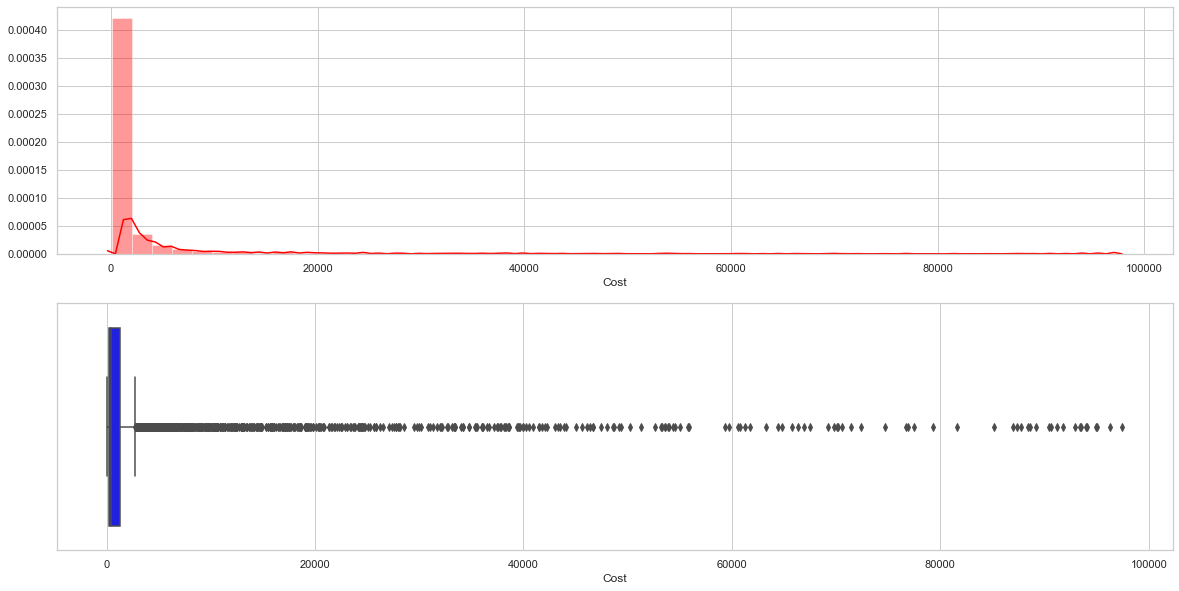

In [100]:
target = 'Cost'
f,ax = plt.subplots(2,1,figsize=(20,10))
axx = ax.flatten()

ax[0].ticklabel_format(style='plain')
ax[1].ticklabel_format(style='plain')

sns.distplot(train[train[target].between(0, 100000)][target],ax = axx[0], color='Red')
sns.boxplot(train[train[target].between(0, 100000)][target],ax = axx[1], color='Blue')

In [102]:
train['Cost'] = train['Cost'].abs()

**4. See the variables datatypes**

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

**5. See The Number/Percentage Of Missing values**

In [110]:
train.isna().sum()/train.shape[0]*100

Customer Id               0.000000
Artist Name               0.000000
Artist Reputation        11.538462
Height                    5.769231
Width                     8.984615
Weight                    9.030769
Material                 11.753846
Price Of Sculpture        0.000000
Base Shipping Price       0.000000
International             0.000000
Express Shipment          0.000000
Installation Included     0.000000
Transport                21.415385
Fragile                   0.000000
Customer Information      0.000000
Remote Location          11.861538
Scheduled Date            0.000000
Delivery Date             0.000000
Customer Location         0.000000
Cost                      0.000000
dtype: float64

**6. Unique Values in each Variable**

In [162]:
pd.concat((train.nunique(), test.nunique()), axis = 1)

,0,1
Customer Id,6500,3500.0
Artist Name,6449,3482.0
Artist Reputation,101,101.0
Height,65,60.0
Width,40,38.0
Weight,4410,2700.0
Material,7,7.0
Price Of Sculpture,3424,2054.0
Base Shipping Price,3732,2434.0
International,2,2.0


In [115]:
train['location'] = train['Customer Location'].apply(lambda x: x.split(',')[0])

In [135]:
train['Country'] = train['Customer Location'].apply(lambda x: len(x.split(',')))

In [149]:
space_country_index = train[ train['Country'] == 1].index
comma_country_index = train[ train['Country'] == 2].index

In [146]:
train.loc[space_country_index, 'location'] = train.iloc[space_country_index]['Customer Location'].apply(lambda x: x.split()[0])

In [160]:
# Extracting Country

train.loc[space_country_index, 'Country'] = train.iloc[space_country_index]['Customer Location'].apply(lambda x: x.split()[1])
train.loc[comma_country_index, 'Country'] = train.iloc[comma_country_index]['Customer Location'].apply(lambda x: x.split(',')[1].split()[0])

# Univariate Analysis

In [176]:
cat_cols = ['Material','International', 'Express Shipment', 
            'Installation Included','Transport',
            'Fragile', 'Customer Information', 
            'Remote Location','Country']

num_cols = ['Artist Reputation', 'Height', 'Width','Weight',
            'Price Of Sculpture', 'Base Shipping Price']

date_cols = ['Scheduled Date', 'Delivery Date']

cat_num = ['Material','International', 'Express Shipment', 
            'Installation Included','Transport',
            'Fragile', 'Customer Information', 
            'Remote Location','Country','Artist Reputation',
           'Height', 'Width','Weight',
            'Price Of Sculpture', 'Base Shipping Price', 'Cost']

**Pie Plots for Categorical Features**

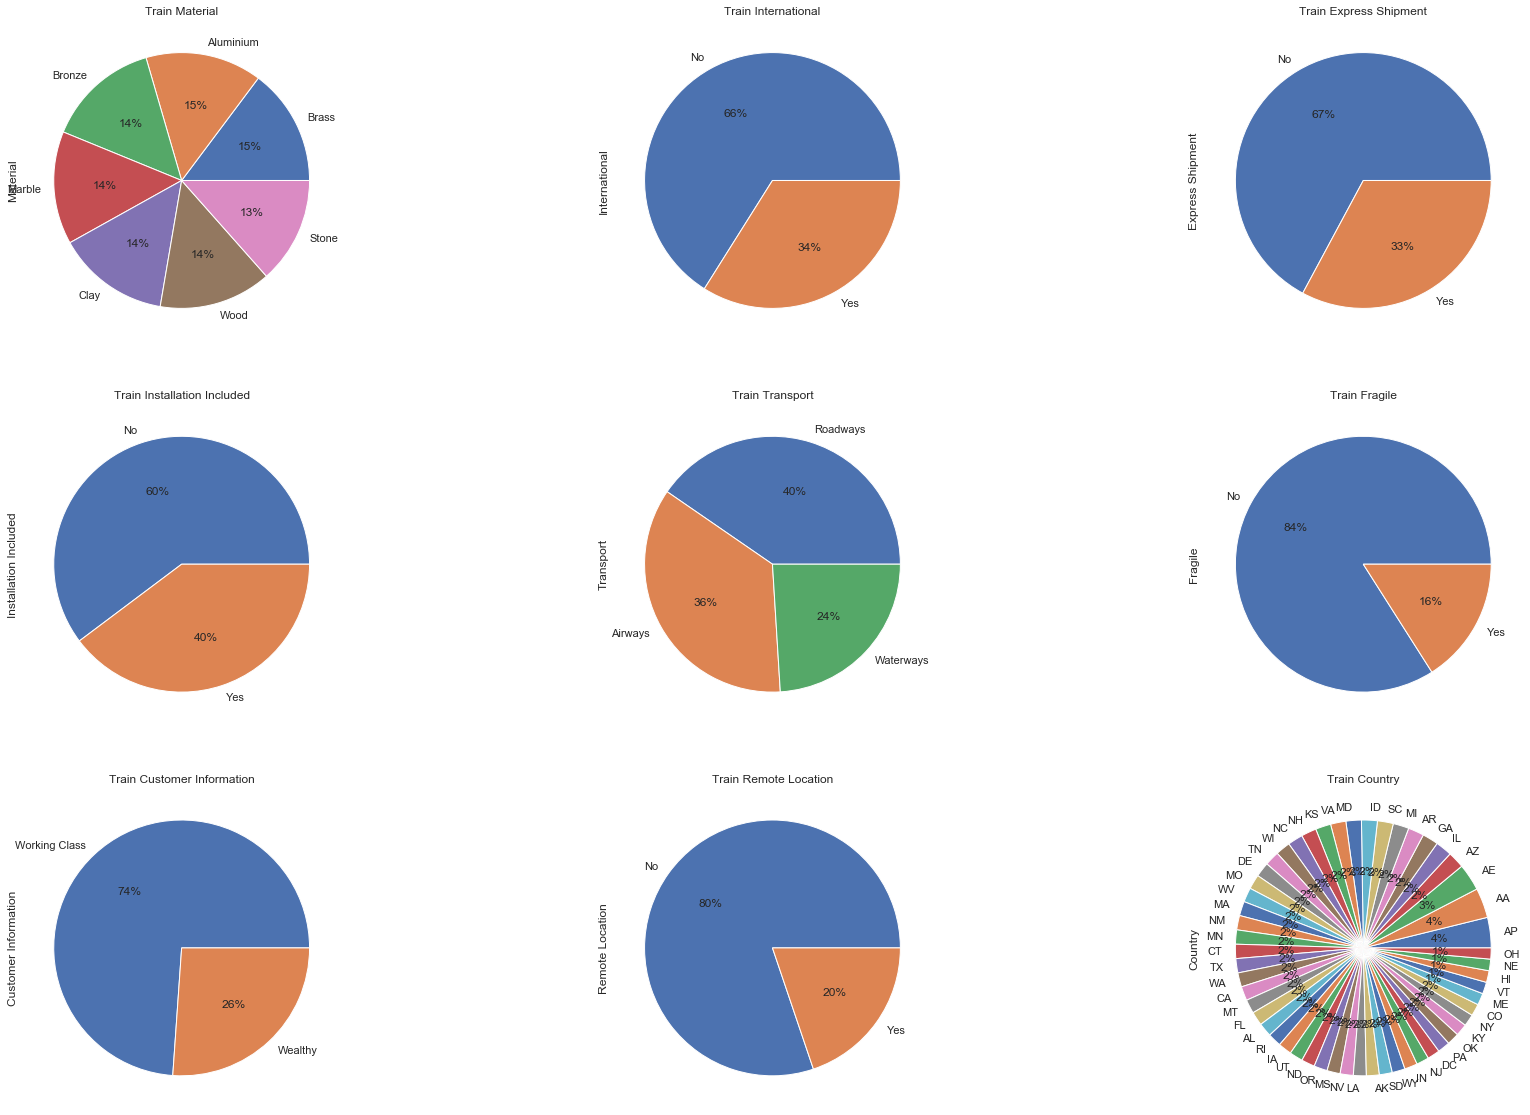

In [169]:
f, ax = plt.subplots(3, 3,figsize = (30,20))
axx = ax.flatten()

index = 0
for column in cat_cols:
    # train[column].value_counts().plot(kind='pie', ax = axx[index], title=column, autopct='%.0f', fontsize=12)
    train[column].value_counts().plot.pie(autopct = '%1.0f%%', title='Train '+column, ax = axx[index])
    index+=1

**Countplots for Categorical**

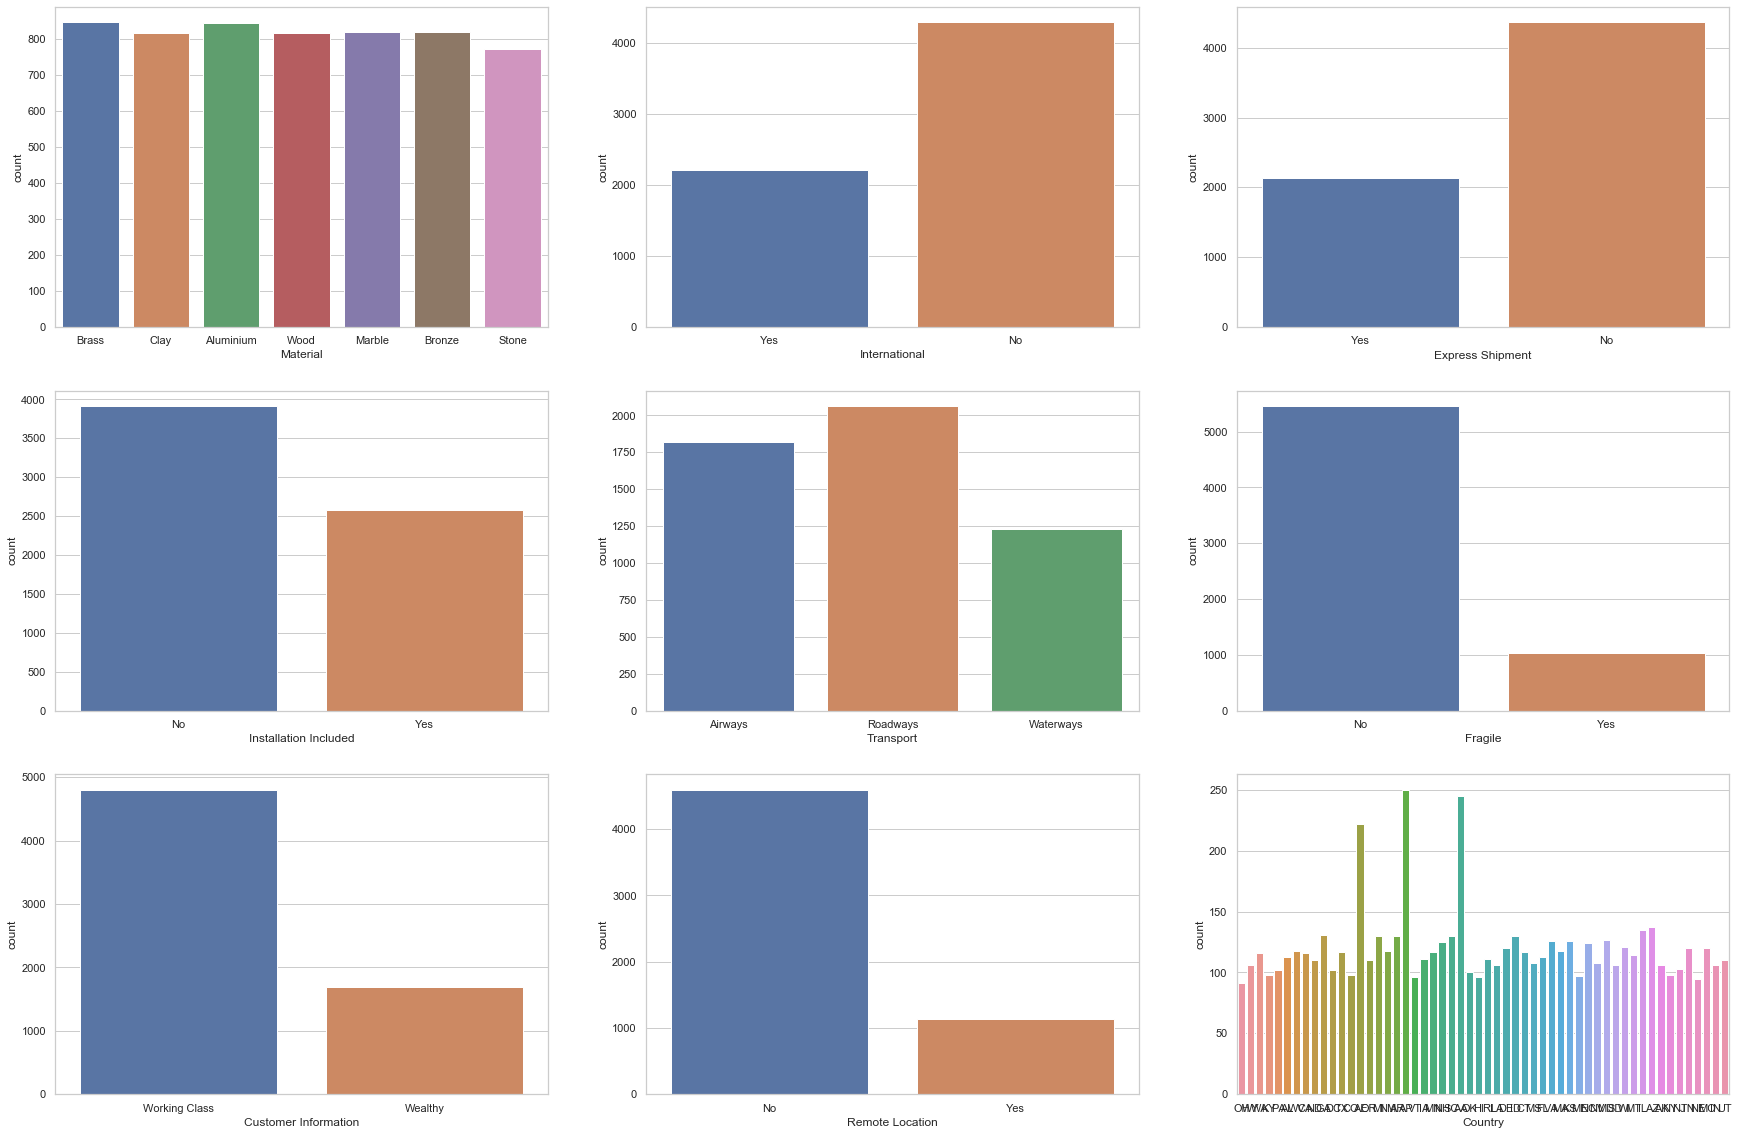

In [173]:
f, ax = plt.subplots(3, 3,figsize = (30,20))
axx = ax.flatten()

index = 0
for column in cat_cols:
    # train[column].value_counts().plot(kind='pie', ax = axx[index], title=column, autopct='%.0f', fontsize=12)
    #train[column].value_counts().plot.bar( ax = axx[index])
    sns.countplot(train[column], ax = axx[index])
    index+=1

**Distplots and Boxplots for Numerical**

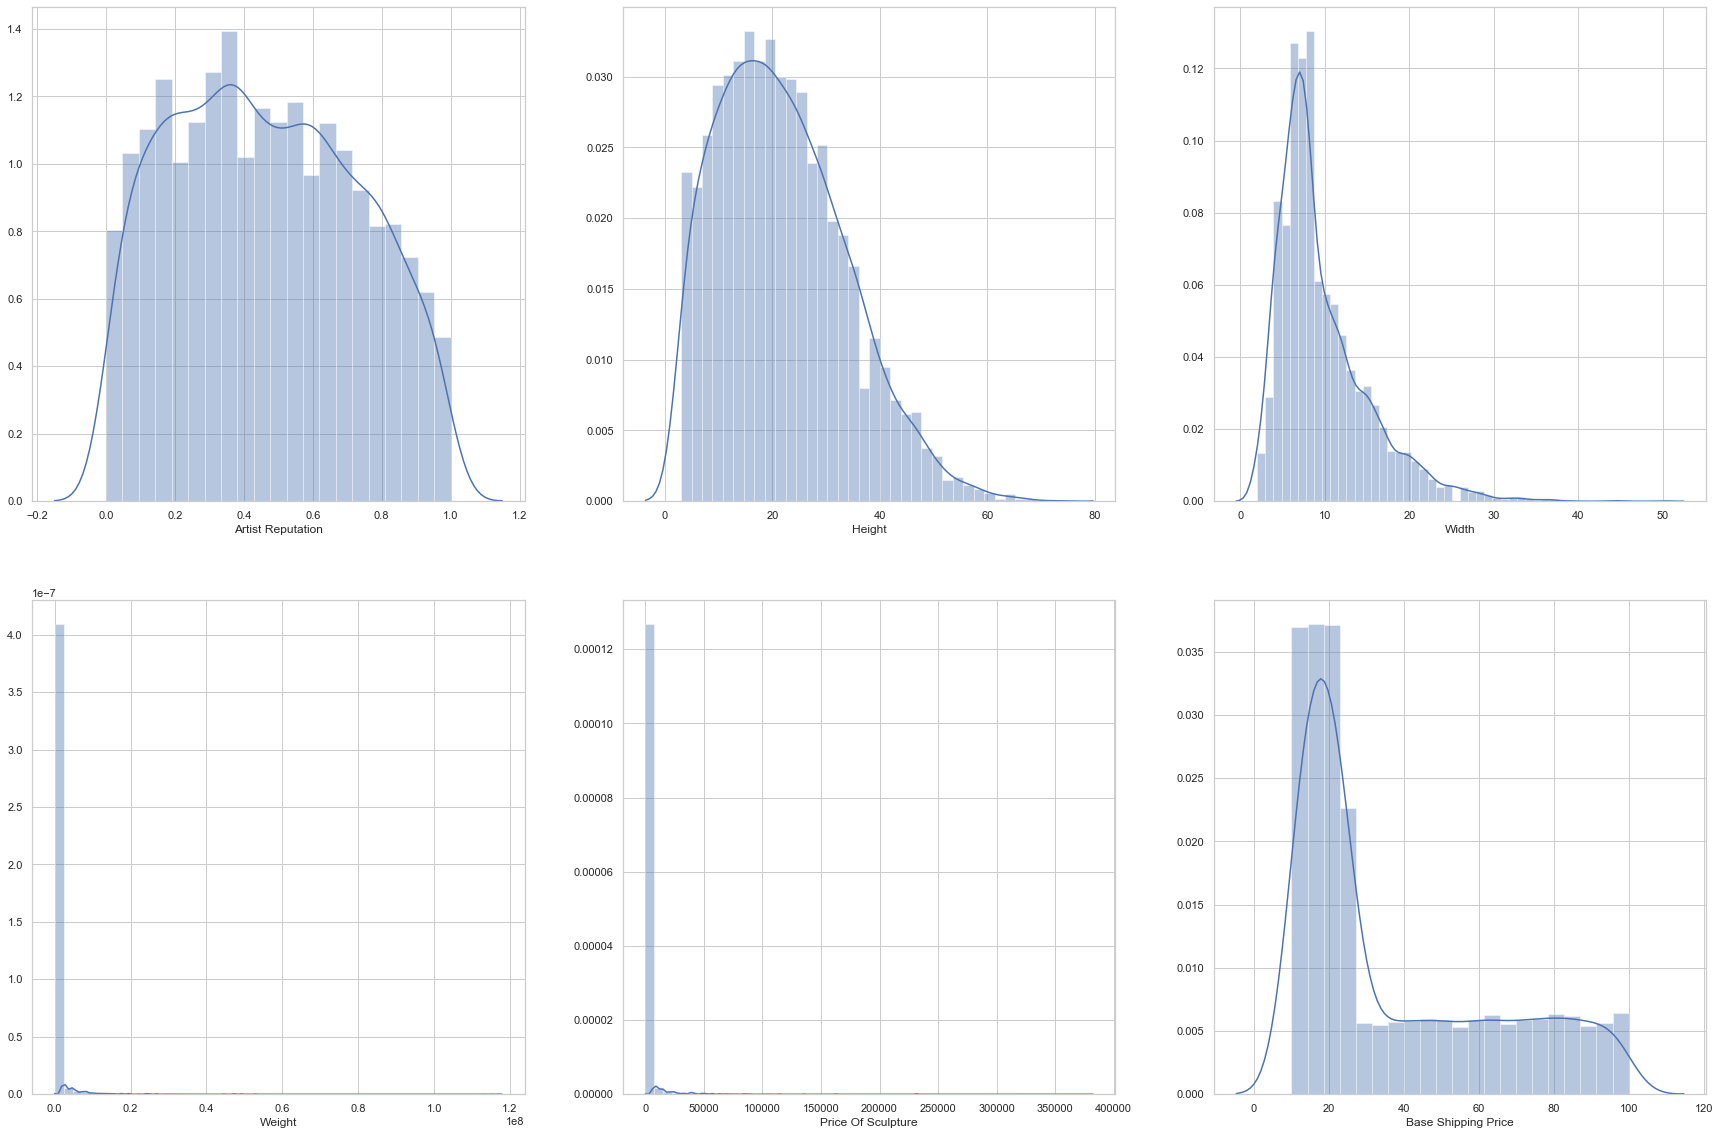

In [174]:
f, ax = plt.subplots(2, 3,figsize = (30,20))
axx = ax.flatten()

index = 0
for column in num_cols:
    sns.distplot(train[column], ax = axx[index])
    index+=1

---
# Bivariate Analysis

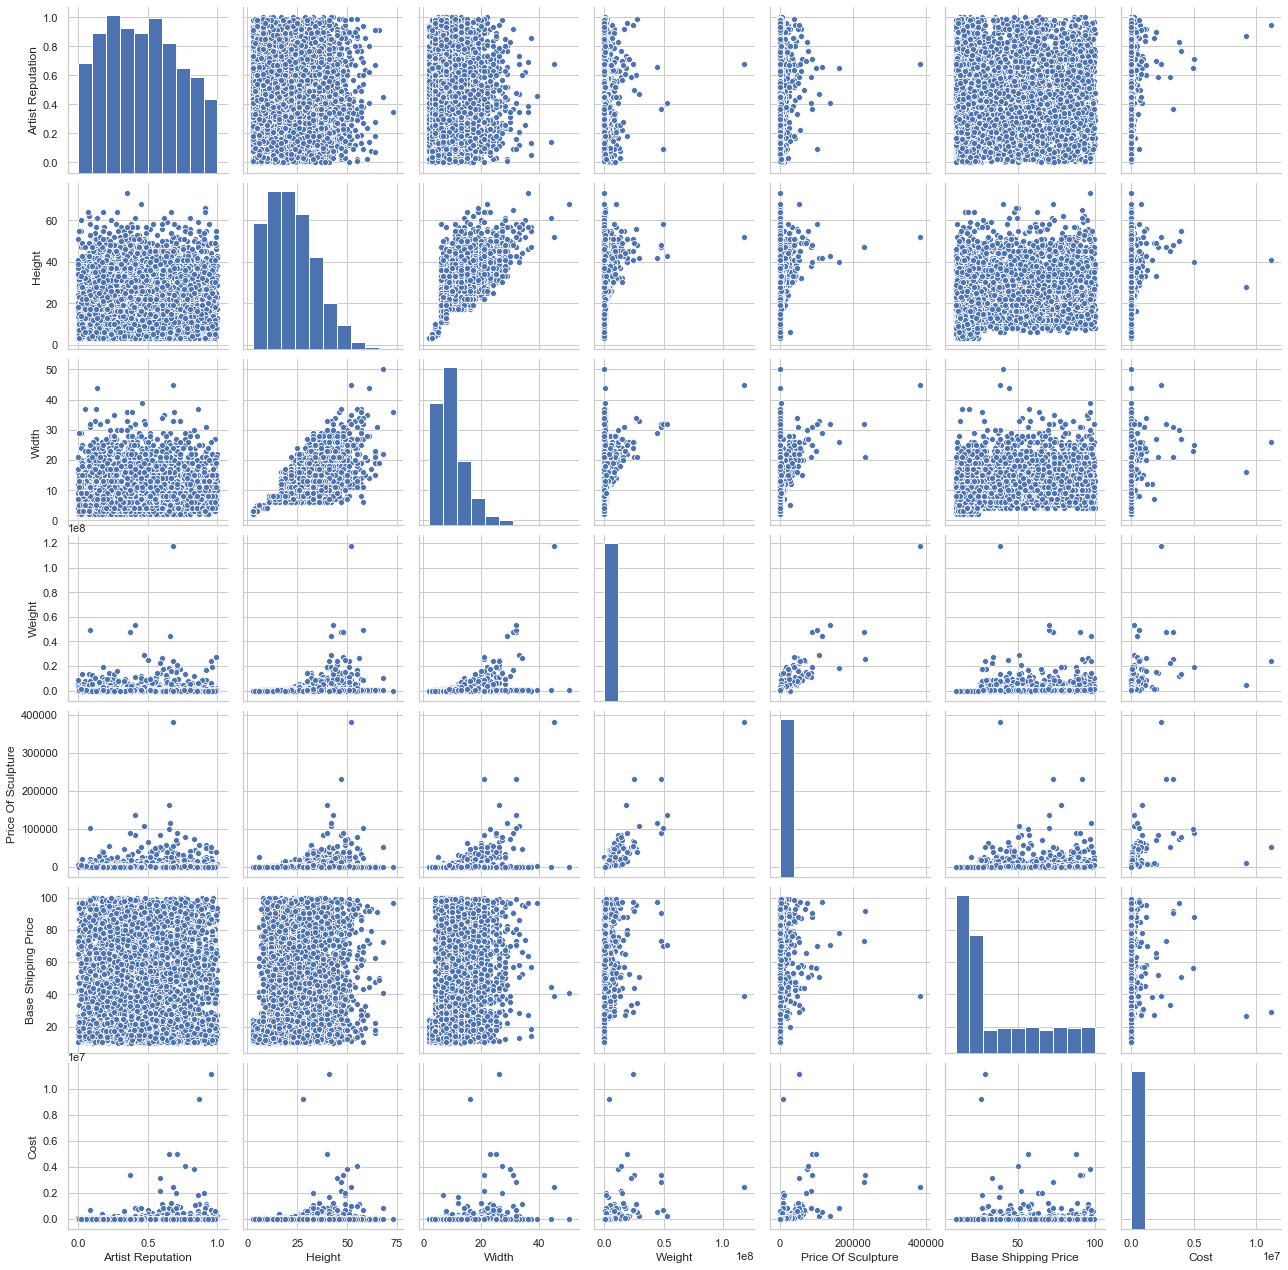

In [177]:
sns.pairplot(train[cat_num])

**Boxplots**

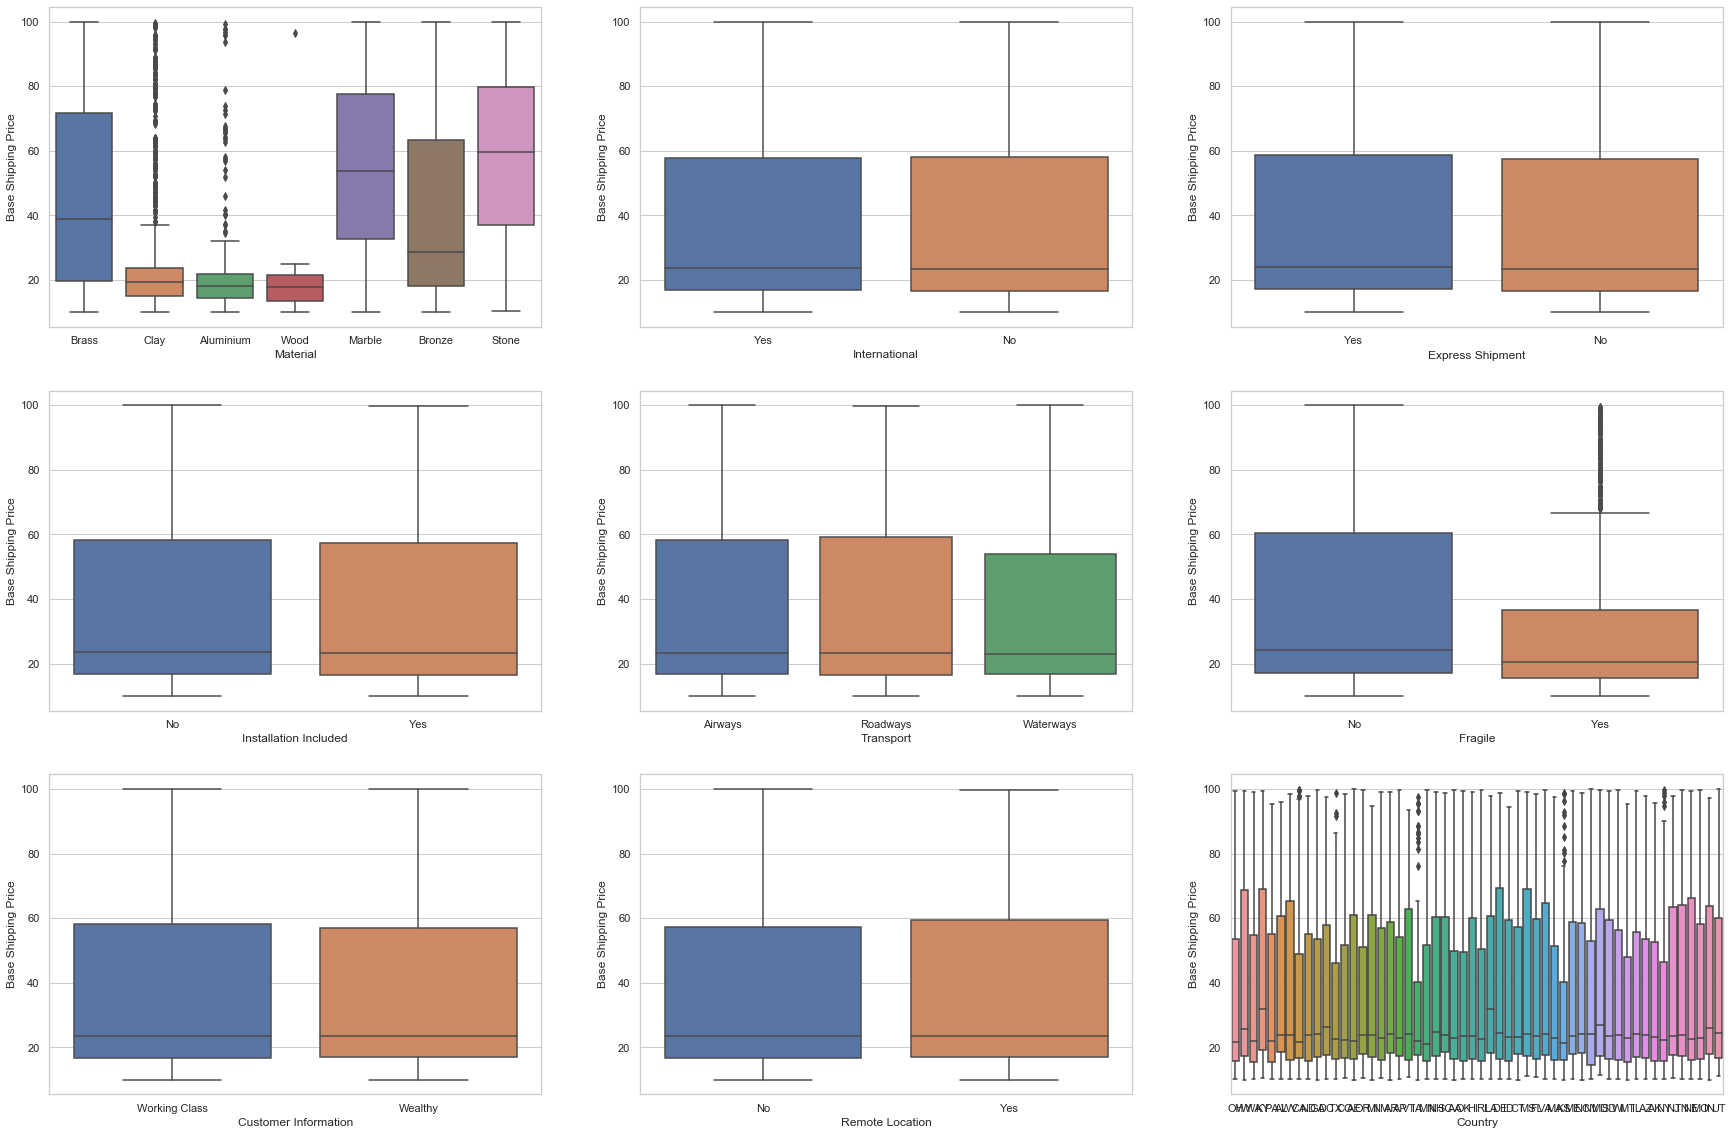

In [190]:
f, ax = plt.subplots(3,3,figsize = (30,20))
axx = ax.flatten()

for index, column in enumerate(cat_cols):
    sns.boxplot(data = train[train['Base Shipping Price'].between(0, 10000)], x = column, y = 'Base Shipping Price', ax = axx[index])

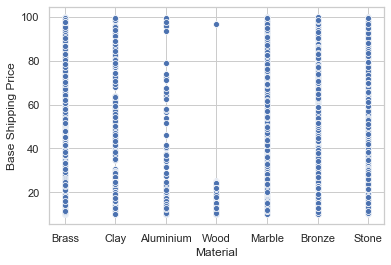

In [199]:
sns.scatterplot(data = train[train['Cost'].between(0, 100000)], x = 'Material', y = 'Base Shipping Price')

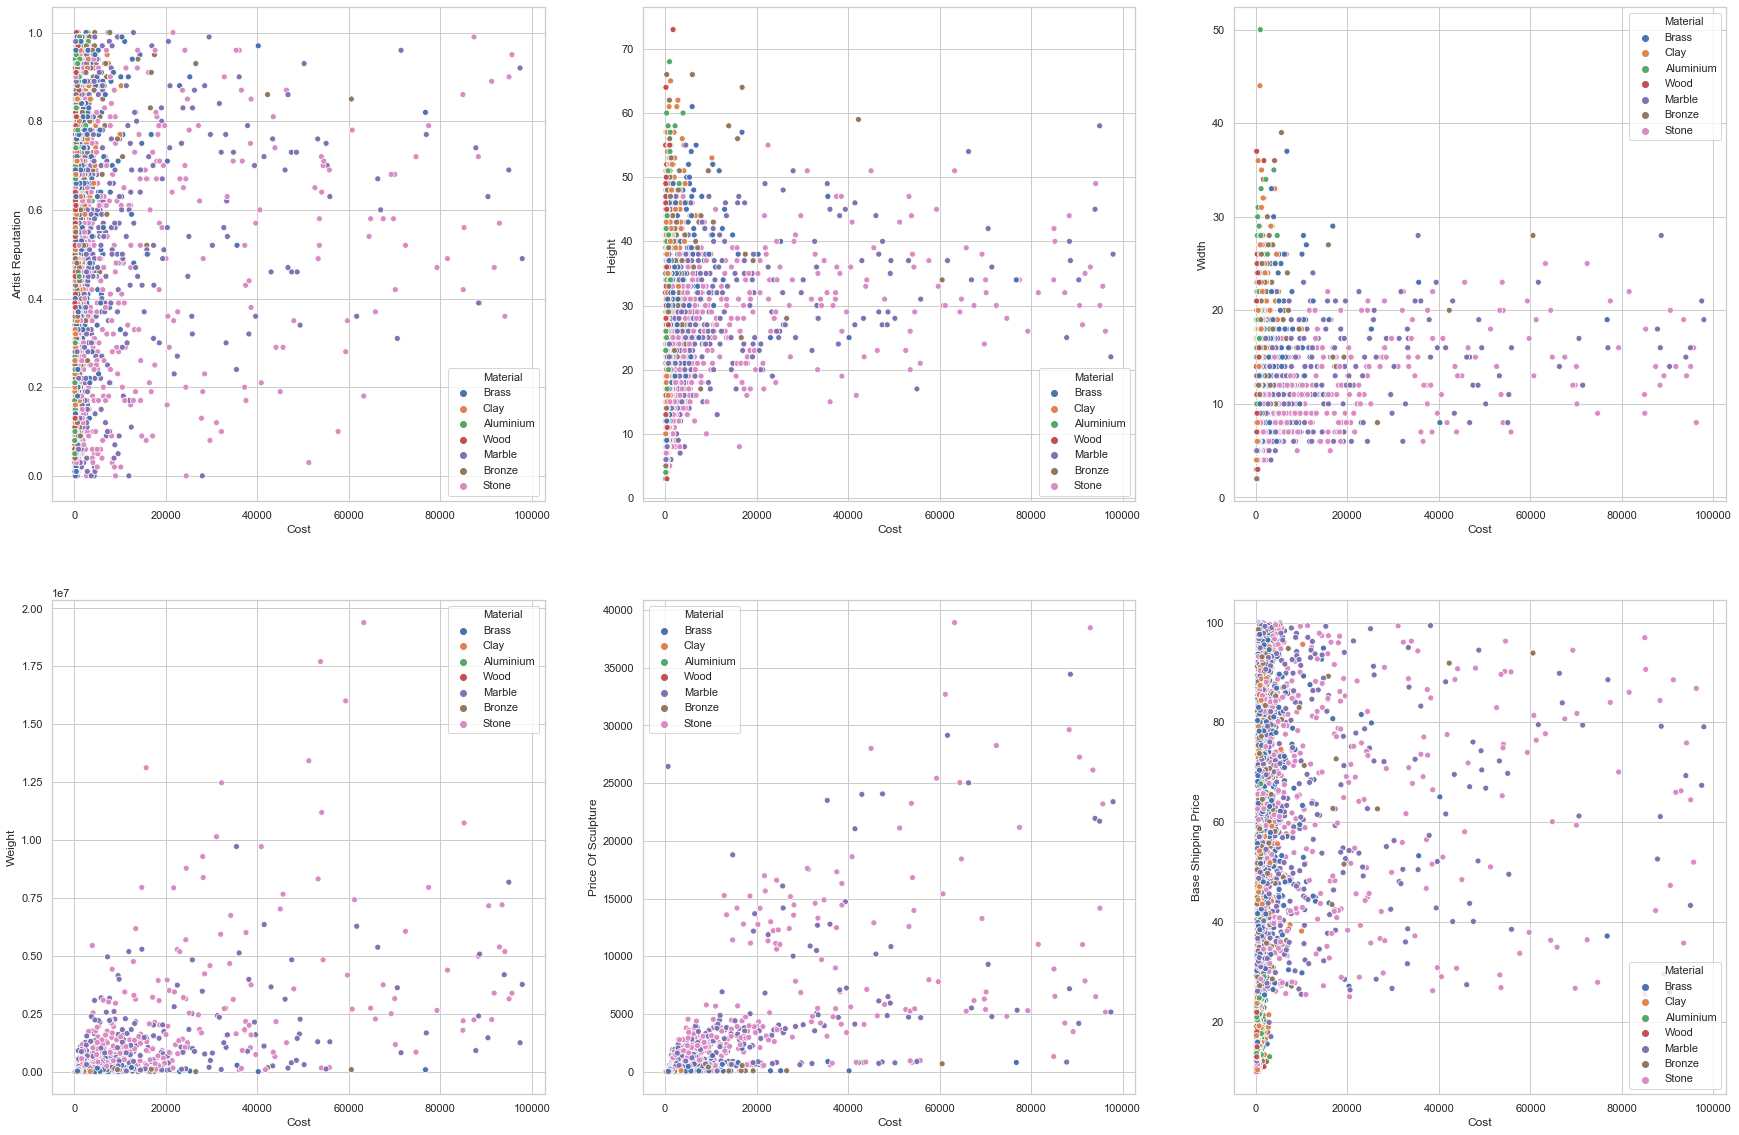

In [203]:
f, ax = plt.subplots(2, 3,figsize = (30,20))
axx = ax.flatten()

for index, column in enumerate(num_cols):
    sns.scatterplot(data = train[train['Cost'].between(0, 100000)], x = 'Cost', y = column, ax = axx[index], hue = 'Material')

# Feature Ideas

1. Country code from location
2. artist rate from cost, height, weight